# Helper function

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_object_img(image, coordinates, resize=0.7, threshold=200, new_color=100):
    # Extract object from image_1 using coordinates
    obj = image[coordinates[0]:coordinates[1], coordinates[2]:coordinates[3]]
    
    # Resize object
    obj = cv2.resize(obj, None, fx=resize, fy=resize, interpolation=cv2.INTER_AREA)
    
    # Apply threshold
    obj[obj > threshold] = new_color
    
    plt.imshow(obj, cmap='gray')
    plt.show()

    return obj

def finding_object(img_findings, img_finding_rgb, objects):
    methods = [
        cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
        cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED
    ]

    methods_name = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
                    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Template Matching Results')

    for idx, method in enumerate(methods):
        result_img = img_finding_rgb.copy()
        for i, (img_finding, object) in enumerate(zip(img_findings, objects), 1):
            # Áp dụng template matching
            result = cv2.matchTemplate(img_finding, object, method)
            
            # Tìm vị trí tốt nhất
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
            
            # Nếu phương pháp là TM_SQDIFF hoặc TM_SQDIFF_NORMED, lấy giá trị nhỏ nhất
            # if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            #     top_left = min_loc
            # else:
            top_left = max_loc
            
            bottom_right = (top_left[0] + object.shape[1], top_left[1] + object.shape[0])
            
            # Vẽ hình chữ nhật xung quanh vị trí tìm thấy
            cv2.rectangle(result_img, top_left, bottom_right, (0, 0, 255), 10)
            label = f"Object {i}"
            cv2.putText(result_img, label, (top_left[0], top_left[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 5)

        # Hiển thị kết quả
        ax = axes[idx // 3, idx % 3]
        ax.imshow(result_img)
        ax.set_title(f'Method: {methods_name[idx]}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()


# Image 1

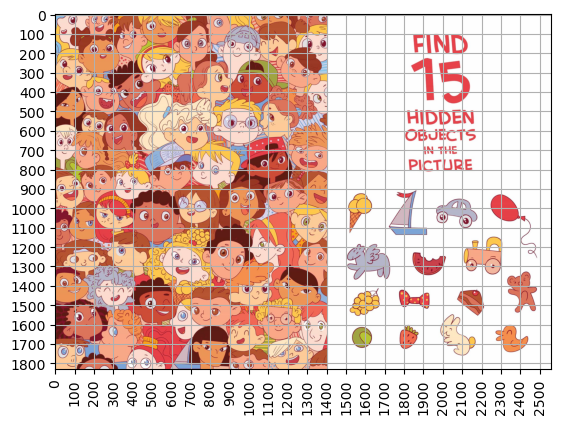

In [3]:
image_1 = cv2.imread('1.jpg')
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
plt.imshow(image_1)
plt.xticks(range(0, image_1.shape[1], 100), rotation=90)
plt.yticks(range(0, image_1.shape[0], 100))
plt.grid(True)
plt.show()

image_1 = cv2.cvtColor(image_1, cv2.COLOR_RGB2GRAY)

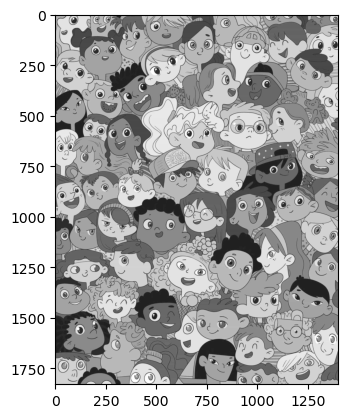

In [4]:
# [y1, y2, x1, x2]
coordinates = [0, 1800, 0, 1400]

img1_finding = image_1[:, coordinates[2]:coordinates[3]]

img1_finding_rgb = cv2.cvtColor(cv2.imread('1.jpg'), cv2.COLOR_BGR2RGB)[:, coordinates[2]:coordinates[3]]

plt.imshow(img1_finding, cmap='gray')
plt.show()



## Object 1

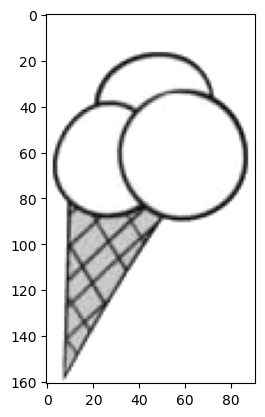

In [5]:
# [y1, y2, x1, x2]
coordinates = [900, 1130, 1510, 1640]
obj_1 = create_object_img(image_1, coordinates, 0.7, 200, 200)

## Object 2

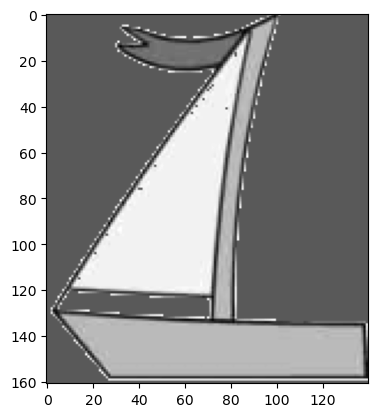

In [6]:
# [y1, y2, x1, x2]
coordinates = [910, 1140, 1720, 1920]
obj_2 = create_object_img(image_1, coordinates, 0.7, 200, 100)


## Object 3

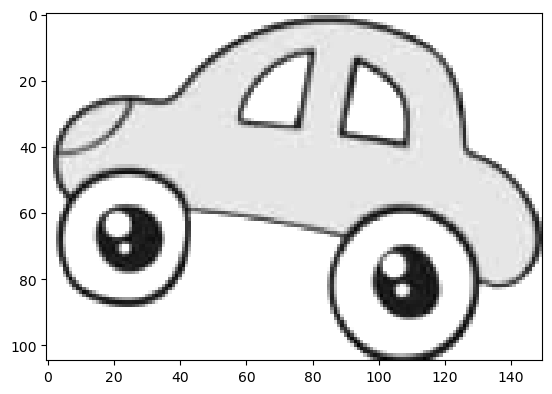

In [7]:
# [y1, y2, x1, x2]
coordinates = [950, 1100, 1965, 2180]
obj_3 = create_object_img(image_1, coordinates, 0.7, 200, 200)


## Object 4

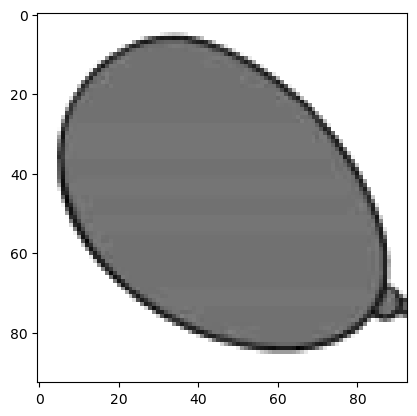

In [8]:
# [y1, y2, x1, x2]
coordinates = [920, 1080, 2240, 2400]
obj_4 = create_object_img(image_1, coordinates, 0.5789, 200, 200)


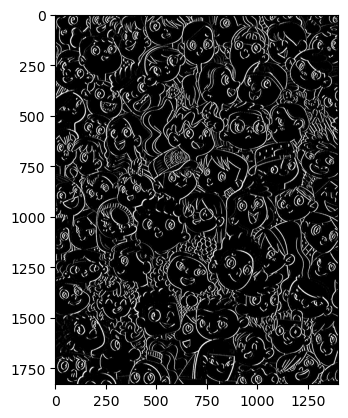

In [9]:
kernel = np.array([
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1]
]).astype(np.float32)

img1_finding_obj_4 = cv2.filter2D(img1_finding, -1, kernel)
plt.imshow(img1_finding_obj_4, cmap='gray')
plt.show()


## Object 5

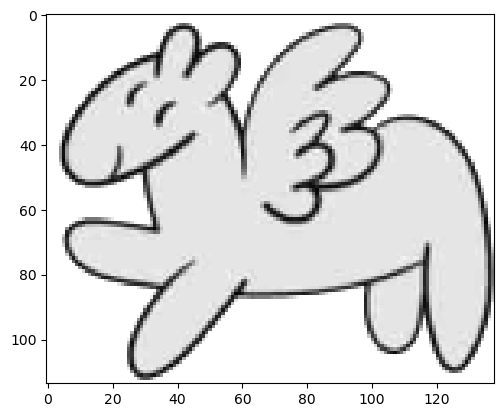

In [10]:
# [y1, y2, x1, x2]
coordinates = [1180, 1370, 1500, 1730]
obj_5 = create_object_img(image_1, coordinates, 0.6, 200, 200)


## Object 6

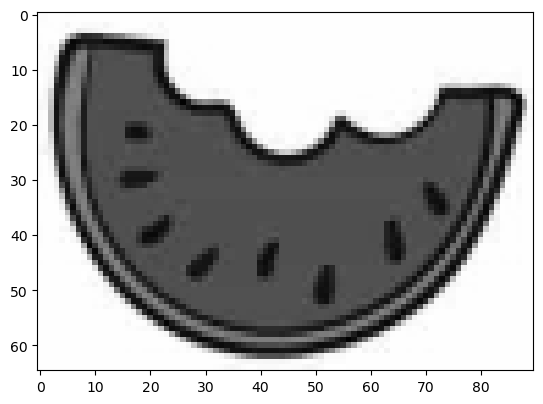

In [11]:
# [y1, y2, x1, x2]
coordinates = [1220, 1350, 1840, 2020]
obj_6 = create_object_img(image_1, coordinates, 0.5, 300, 200)
obj_6 = cv2.Canny(obj_6, 100, 200)

In [12]:
img1_finding_obj_6 = cv2.Canny(img1_finding, 100, 200)


## Object 7

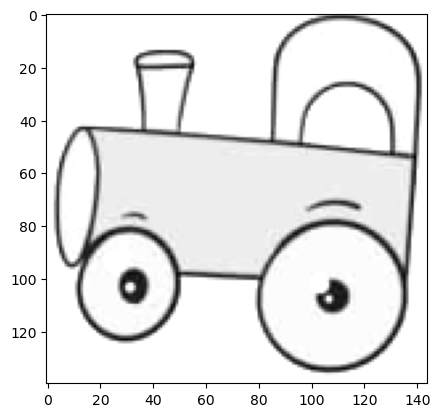

In [13]:
# [y1, y2, x1, x2]
coordinates = [1147, 1347, 2105, 2310]
obj_7 = create_object_img(image_1, coordinates, 0.7, 200, 200)


## Object 8

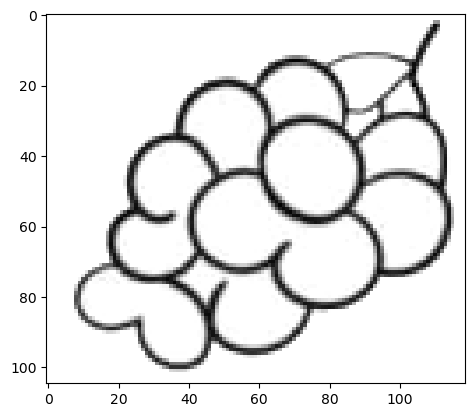

In [14]:
# [y1, y2, x1, x2]
coordinates = [1410, 1560, 1510, 1680]
obj_8 = create_object_img(image_1, coordinates, 0.7, 200, 200)


## Object 9

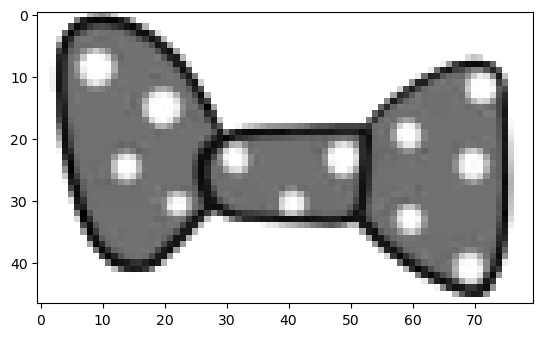

In [15]:
# [y1, y2, x1, x2]
coordinates = [1420, 1520, 1770, 1940]
obj_9 = create_object_img(image_1, coordinates, 0.47, 200, 200)


## Object 10

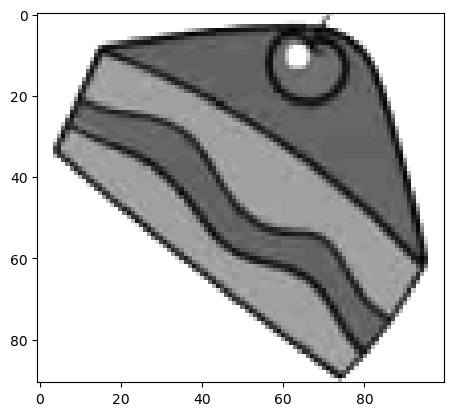

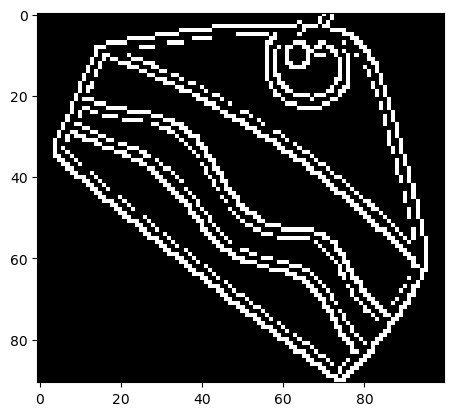

In [16]:
# [y1, y2, x1, x2]
coordinates = [1418, 1555, 2070, 2220]
obj_10 = create_object_img(image_1, coordinates, 0.667, 200, 200)
obj_10 = cv2.Canny(obj_10, 50, 150)
plt.imshow(obj_10, cmap='gray')


In [17]:
img1_finding_obj_10 = cv2.Canny(img1_finding, 50, 150)


## Object 11

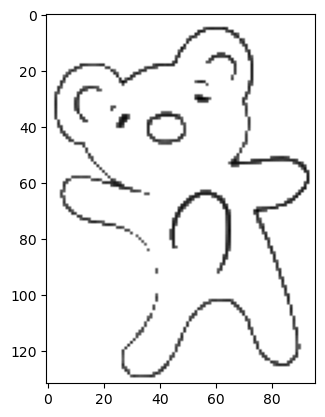

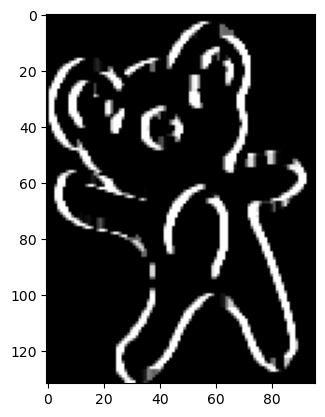

In [18]:
# [y1, y2, x1, x2]
coordinates = [1320, 1540, 2330, 2490]
obj_11 = create_object_img(image_1, coordinates, 0.6, 100, 200)

kernel = np.array([
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1]
]).astype(np.float32)

obj_11 = cv2.filter2D(obj_11, -1, kernel)
plt.imshow(obj_11, cmap='gray')
plt.show()


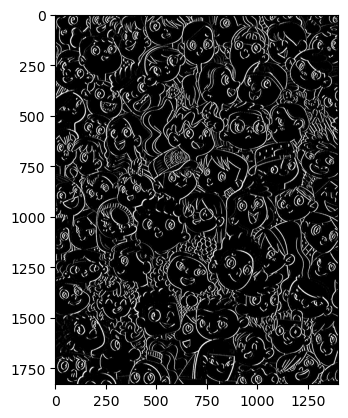

In [19]:
kernel = np.array([
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1]
]).astype(np.float32)

img1_finding_obj_11 = cv2.filter2D(img1_finding, -1, kernel)
plt.imshow(img1_finding_obj_11, cmap='gray')
plt.show()


## Object 12

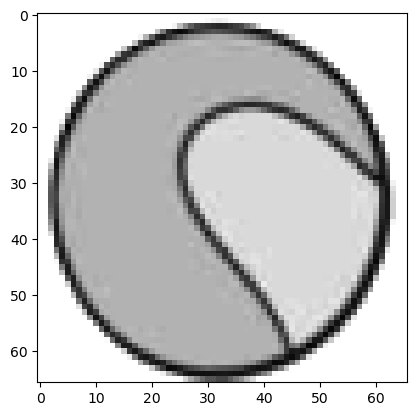

In [20]:
# [y1, y2, x1, x2]
coordinates = [1610, 1720, 1530, 1640]
obj_12 = create_object_img(image_1, coordinates, 0.6, 200, 200)


## Object 13

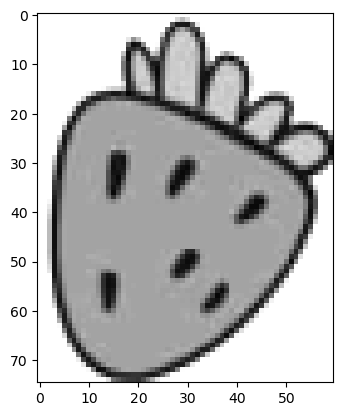

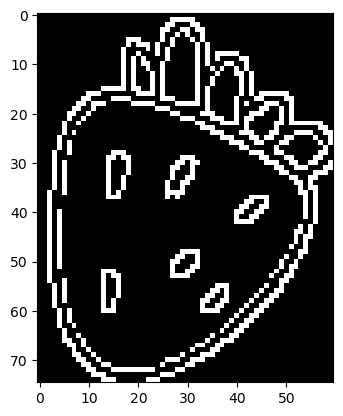

In [21]:
# [y1, y2, x1, x2]
coordinates = [1600, 1725, 1775, 1875]
obj_13 = create_object_img(image_1, coordinates, 0.6, 200, 200)
obj_13 = cv2.Canny(obj_13, 50, 150)
plt.imshow(obj_13, cmap='gray')
plt.show()



In [22]:
img1_finding_obj_13 = cv2.Canny(img1_finding, 50, 150)


## Object 14

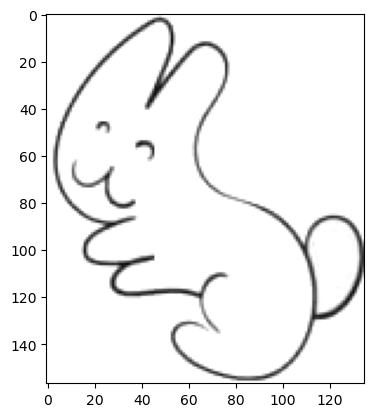

In [23]:
# [y1, y2, x1, x2]
coordinates = [1545, 1760, 1985, 2170]
obj_14 = create_object_img(image_1, coordinates, 0.73, 200, 200)
obj_14 = cv2.Canny(obj_14, 50, 150)


In [24]:
img1_finding_obj_14 = cv2.Canny(img1_finding, 50, 150)


## Object 15

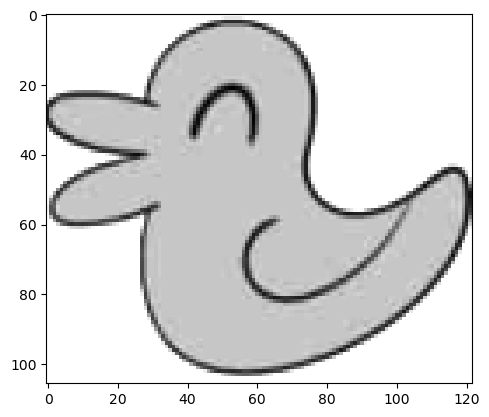

In [25]:
# [y1, y2, x1, x2]
coordinates = [1600, 1745, 2275, 2442]
obj_15 = create_object_img(image_1, coordinates, 0.73, 200, 200)
obj_15 = cv2.Canny(obj_15, 50, 150)


In [26]:
img1_finding_obj_15 = cv2.Canny(img1_finding, 50, 150)


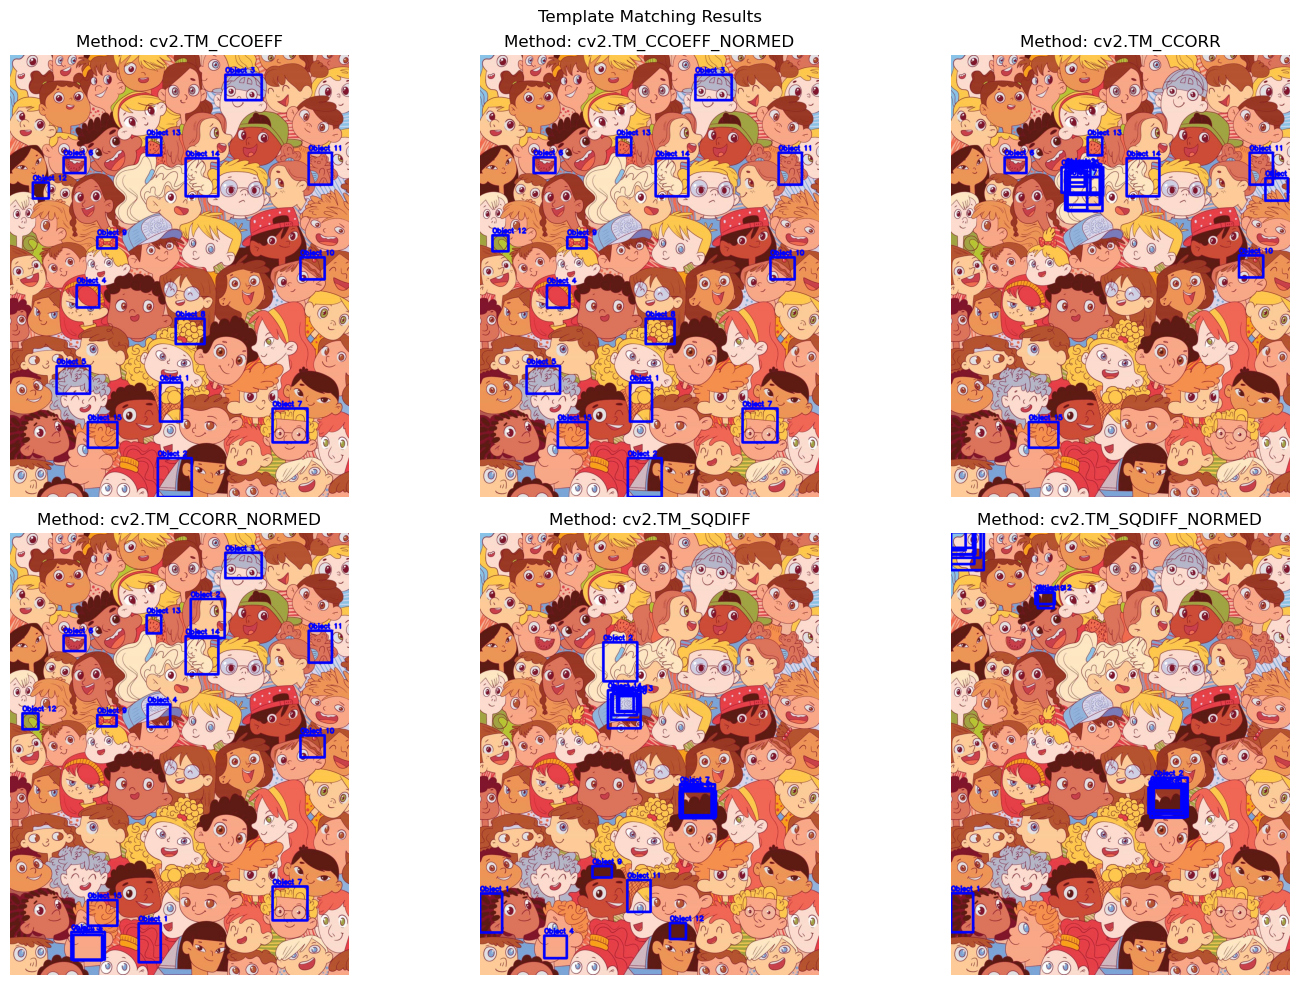

In [27]:
objects = [obj_1, obj_2, obj_3, obj_4, obj_5, obj_6, obj_7, obj_8, obj_9, obj_10, obj_11, obj_12, obj_13, obj_14, obj_15]
img_findings = [img1_finding, img1_finding, img1_finding, img1_finding_obj_4, img1_finding, img1_finding_obj_6, img1_finding, img1_finding, img1_finding, img1_finding_obj_10, img1_finding_obj_11, img1_finding, img1_finding_obj_13, img1_finding_obj_14, img1_finding_obj_15]

finding_object(img_findings, img1_finding_rgb, objects)


# Image 2

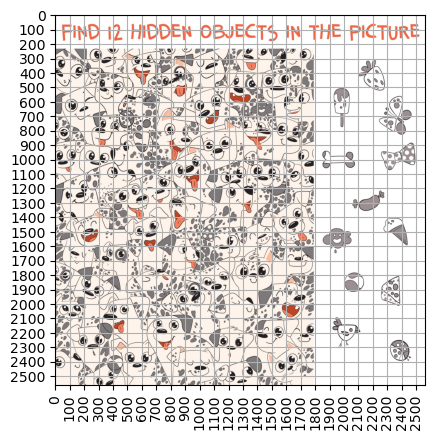

In [28]:
image_2 = cv2.imread('2.jpg')
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
plt.imshow(image_2)
plt.xticks(range(0, image_2.shape[1], 100), rotation=90)
plt.yticks(range(0, image_2.shape[0], 100))
plt.grid(True)
plt.show()

image_2 = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY)

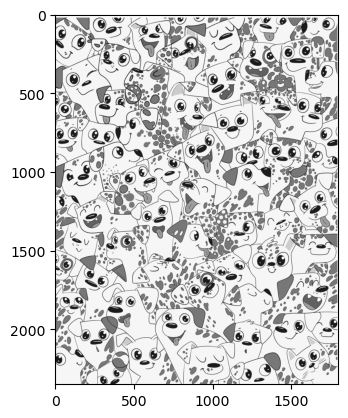

In [29]:
# [y1, y2, x1, x2]
coordinates = [210, 2500, 0, 1800]

img2_finding = image_2[coordinates[0]:, coordinates[2]:coordinates[3]]

img2_finding_rgb = cv2.cvtColor(cv2.imread('2.jpg'), cv2.COLOR_BGR2RGB)[coordinates[0]:, coordinates[2]:coordinates[3]]

plt.imshow(img2_finding, cmap='gray')
plt.show()



## Object 1

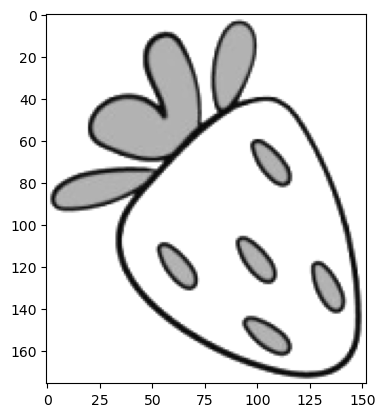

In [30]:
# [y1, y2, x1, x2]
coordinates = [305, 525, 2095, 2285]
obj_1 = create_object_img(image_2, coordinates, 0.8, 200, 200)


## Object 2

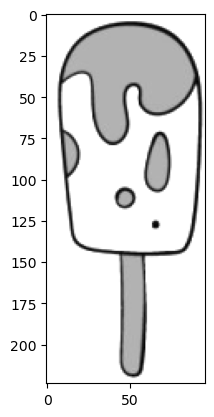

In [31]:
# [y1, y2, x1, x2]
coordinates = [500, 780, 1920, 2040]
obj_2 = create_object_img(image_2, coordinates, 0.8, 200, 200)


## Object 3

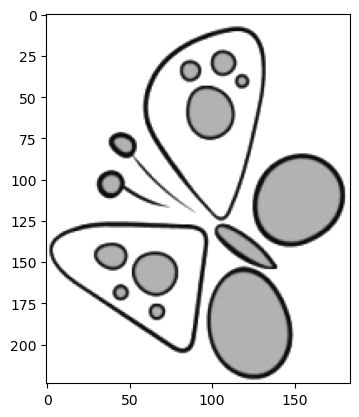

In [32]:
# [y1, y2, x1, x2]
coordinates = [550, 830, 2240, 2470]
obj_3 = create_object_img(image_2, coordinates, 0.8, 200, 200)


## Object 4


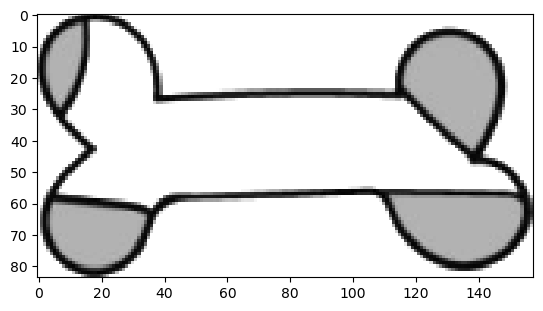

In [33]:
# [y1, y2, x1, x2]
coordinates = [940, 1060, 1850, 2075]
obj_4 = create_object_img(image_2, coordinates, 0.7, 200, 200)


## Object 5

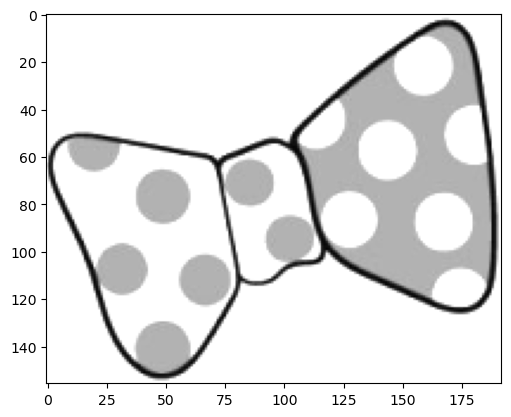

In [34]:
# [y1, y2, x1, x2]
coordinates = [880, 1075, 2255, 2495]
obj_5 = create_object_img(image_2, coordinates, 0.8, 200, 200)


## Object 6

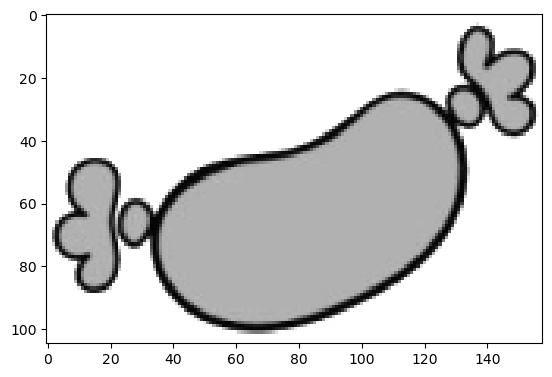

In [35]:
# [y1, y2, x1, x2]
coordinates = [1210, 1360, 2055, 2280]
obj_6 = create_object_img(image_2, coordinates, 0.7, 200, 200)


## Object 7

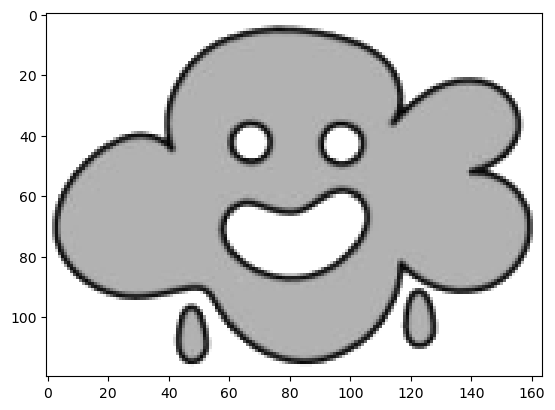

In [36]:
# [y1, y2, x1, x2]
coordinates = [1470, 1620, 1850, 2055]
obj_7 = create_object_img(image_2, coordinates, 0.8, 200, 200)


## Object 8


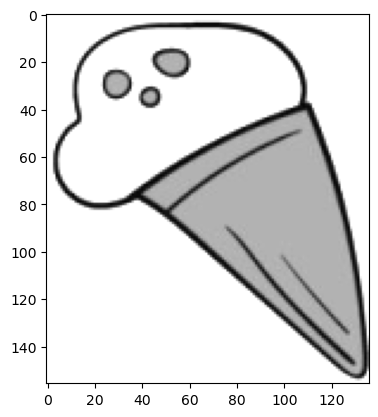

In [37]:
# [y1, y2, x1, x2]
coordinates = [1400, 1595, 2270, 2440]
obj_8 = create_object_img(image_2, coordinates, 0.8, 200, 200)


## Object 9


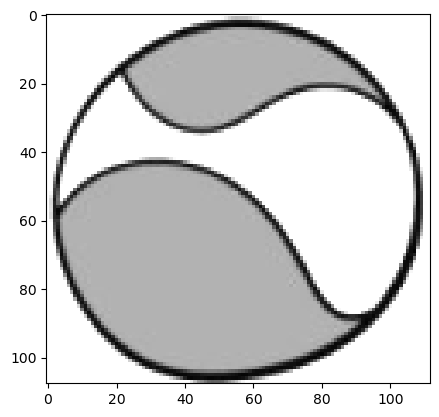

In [38]:
# [y1, y2, x1, x2]
coordinates = [1780, 1915, 2000, 2140]
obj_9 = create_object_img(image_2, coordinates, 0.8, 200, 200)


## Object 10


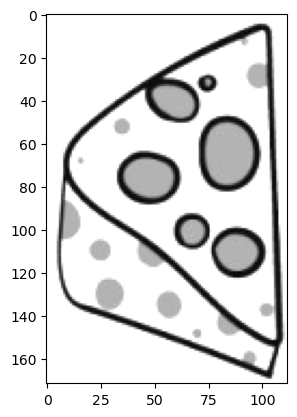

In [39]:
# [y1, y2, x1, x2]
coordinates = [1800, 2015, 2250, 2390]
obj_10 = create_object_img(image_2, coordinates, 0.8, 200, 200)


## Object 11


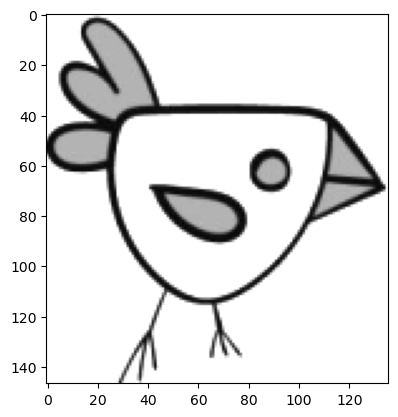

In [40]:
# [y1, y2, x1, x2]
coordinates = [2090, 2300, 1920, 2115]
obj_11 = create_object_img(image_2, coordinates, 0.7, 200, 200)


## Object 12


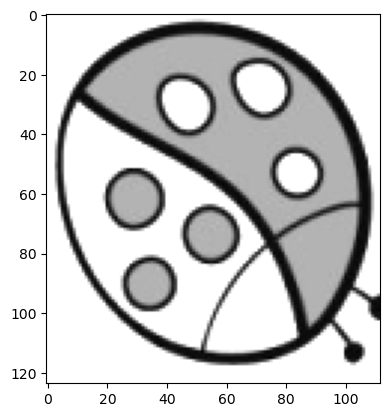

In [41]:
# [y1, y2, x1, x2]
coordinates = [2245, 2400, 2315, 2455]
obj_12 = create_object_img(image_2, coordinates, 0.8, 200, 200)


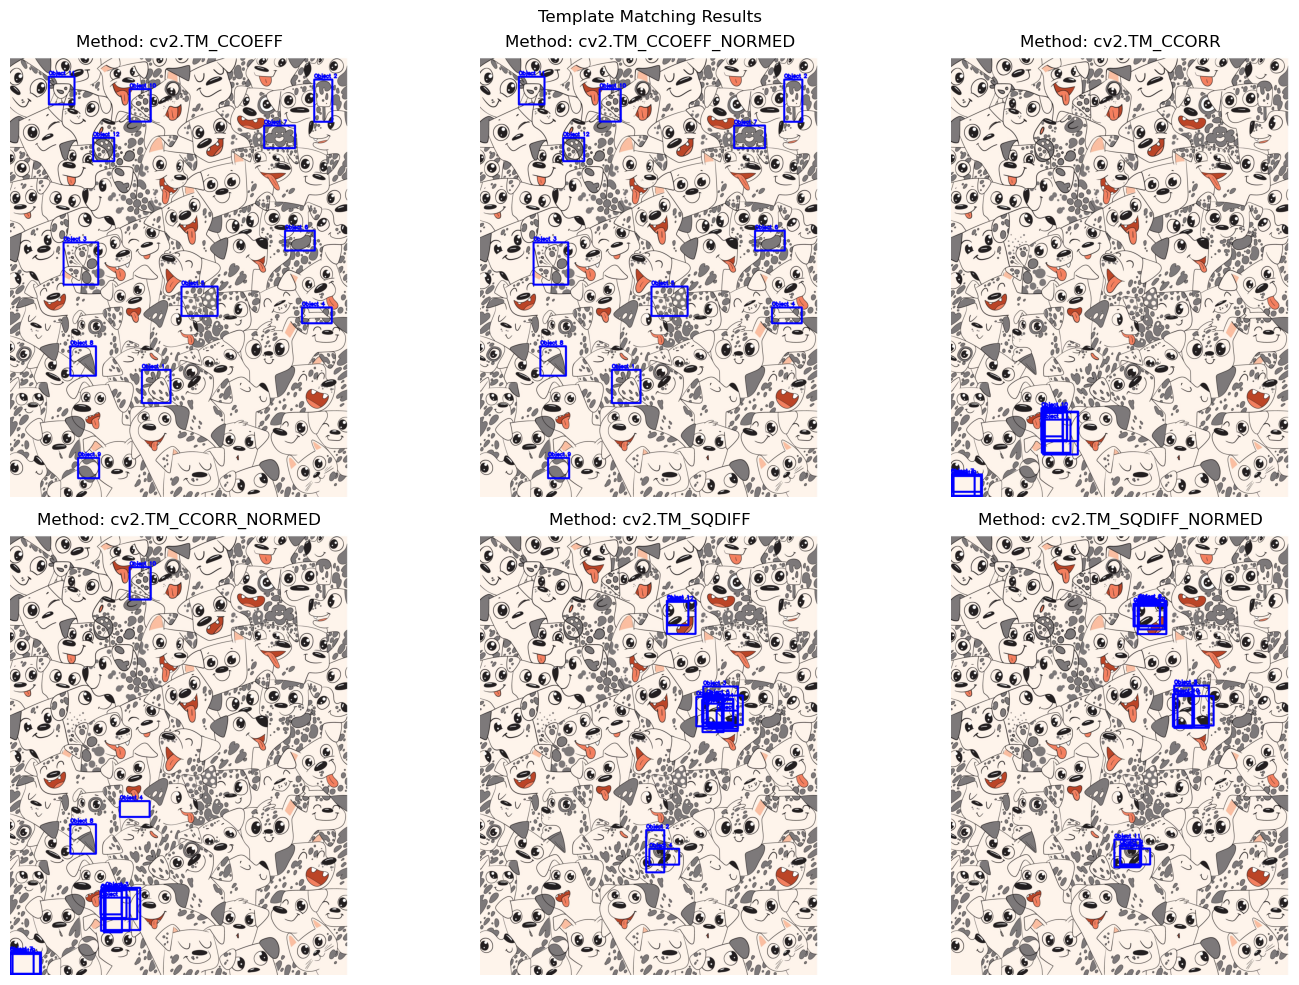

In [42]:
objects = [obj_1, obj_2, obj_3, obj_4, obj_5, obj_6, obj_7, obj_8, obj_9, obj_10, obj_11, obj_12]

img2_findings = [img2_finding] * 12

finding_object(img2_findings, img2_finding_rgb, objects)